In [1]:
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns


import geomstats.backend as gs
import geomstats.visualization as visualization


from geomstats.learning.frechet_mean import FrechetMean
from geomstats.geometry.matrices import Matrices, MatricesMetric

from geomstats.geometry.symmetric_matrices import SymmetricMatrices
from geomstats.geometry import spd_matrices

from geomstats.geometry.hypersphere import Hypersphere

d=6
sphere = Hypersphere(dim=d) 
mfd= sphere.metric


/Users/junhaozhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/junhaozhu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
INFO: Using numpy backend


In [22]:
import pandas as pd
import scipy.fft as fft
import scipy.stats as stats

In [3]:
time_names = pd.read_csv('/Users/junhaozhu/Code/Manifold_TS/RealData/CellType/time_names.csv', index_col=0)
time_names = time_names['time'].to_numpy()

time_names = time_names[time_names != 'D8.25']
time_names = time_names[time_names != 'D8.75']

# df = pd.read_csv(r'..\wot\data\full_df.csv')
df = pd.read_csv('/Users/junhaozhu/Code/Manifold_TS/RealData/CellType/ot_df.csv')
df = df[df['day'] != 8.25]
df = df[df['day'] != 8.75]
time_labels = [float(i[1:]) for i in time_names]
sample_size = pd.DataFrame()
sample_size['day'] = time_labels
sample_size['sample size'] = df.groupby('day').size().to_numpy()
T = len(time_labels)
k = len(np.unique(df['cell type']))

type_list = df['cell type'].unique()
probs = []
for t in range(T):
    p_temp = df['cell type'][df['day'] == time_labels[t]].value_counts(normalize=True).reindex(type_list, fill_value=0).to_numpy()
    probs.append(p_temp)
probs = np.array(probs)

In [4]:
data=np.sqrt(probs)
data_df = pd.DataFrame(data=data**2,index= np.arange(37),columns=type_list.tolist())

In [146]:
def calc_theta_r(alpha_r):
    ### return the theta_r in Algorithm 1 , line 6 
    theta = alpha_r/(1+alpha_r)
    return theta

def calc_inter(theta_r, p,q):
    ### return the theta_r in Algorithm 1 , line 7
    gd = mfd.geodesic(p,q)
    return gd(theta_r)

def cyclic_proximal_point_algorithm(data, alpha, lambd,max_itr = 1000):
    """
    Implements the cyclic proximal point algorithm for p-TVq for manifold data.
    
    :param f: Manifold-valued image, numpy array of shape (n, m)
    :param α: Regularization parameter
    :param λ: Sequence for proximal mappings
    :param n: Number of rows in the image
    :param m: Number of columns in the image
    :return: Minimizer x of the p-TVq problem
    """
    Y = np.copy(data)
    n = Y.shape[0]
    mu = np.copy(Y)
    for r in range(max_itr):
        alpha_r = alpha/(r+2)
        for i in range(n-1):
            theta = calc_theta_r(alpha_r)
            mu_i_new  = calc_inter(theta, mu[i],Y[i])
            mu[i] = mu_i_new
        
        for j in range(n-1):
            theta = 0.5* min(lambd*n*alpha_r/mfd.dist(mu[j],mu[j+1]),1)
            mu_j_new = calc_inter(theta, mu[j],mu[j+1])
            mu_j1_new = calc_inter(theta, mu[j+1],mu[j])
            mu[j] =  mu_j_new
            mu[j+1] =mu_j1_new
       
        

    return mu

# Example usage

def calc_theta_r_eu(alpha_r):
    ### return the theta_r in Algorithm 1 , line 6 
    theta = alpha_r/(1+alpha_r)
    return theta

def calc_inter_eu(theta_r, p,q):
    ### return the theta_r in Algorithm 1 , line 7
    
    return p+(theta_r)*(q-p)

def cyclic_proximal_point_algorithm_eu(data, alpha, lambd,max_itr = 1000):
    """
    Implements the cyclic proximal point algorithm for p-TVq for manifold data.
    
    :param f: Manifold-valued image, numpy array of shape (n, m)
    :param α: Regularization parameter
    :param λ: Sequence for proximal mappings
    :param n: Number of rows in the image
    :param m: Number of columns in the image
    :return: Minimizer x of the p-TVq problem
    """
    Y = np.copy(data)
    n = Y.shape[0]
    mu = np.copy(Y)
    for r in range(max_itr):
        alpha_r = alpha/(r+2)
        for i in range(n-1):
            theta = calc_theta_r_eu(alpha_r)
            mu_i_new  = calc_inter_eu(theta, mu[i],Y[i])
            mu[i] = mu_i_new
        
        for j in range(n-1):
            Dj = np.sqrt(np.sum((mu[j]-mu[j+1])**2))
            theta = 0.5* min(lambd*n*alpha_r/Dj,1)
            mu_j_new = calc_inter_eu(theta, mu[j],mu[j+1])
            mu_j1_new = calc_inter_eu(theta, mu[j+1],mu[j])
            mu[j] =  mu_j_new
            mu[j+1] =mu_j1_new
       
        

    return mu




In [42]:
# lambd = 0.2
# alpha=0.05



# muhat = cyclic_proximal_point_algorithm(data=data, alpha=alpha, lambd=lambd,max_itr = 1000)

[]

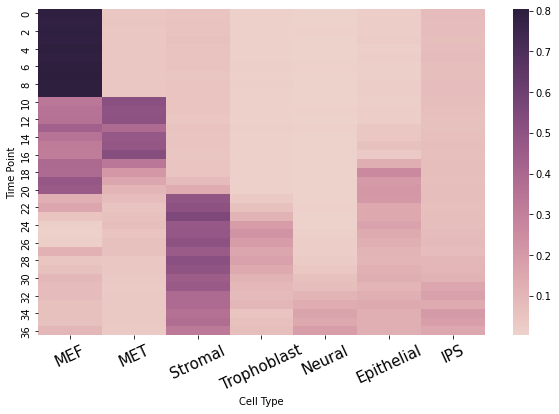

In [43]:
# fig, ax = plt.subplots(figsize=(10,6))
# sns.heatmap(data_df,cmap=sns.cubehelix_palette(as_cmap=True),ax=ax)
# ax.set(xlabel="Cell Type", ylabel="Time Point")
# #ax.xaxis.tick_top()

# ax.set_xticklabels(labels=type_list.tolist(),fontsize=15,rotation=25)
# plt.plot()

[]

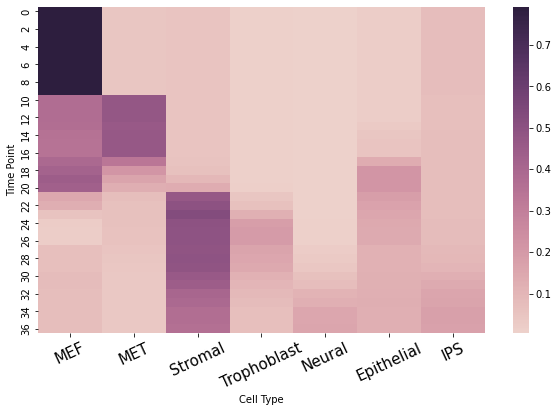

In [70]:
# mudf = pd.DataFrame(data=best_muhat**2,index= np.arange(37),columns=type_list.tolist())
# fig, ax = plt.subplots(figsize=(10,6))
# sns.heatmap(mudf,cmap=sns.cubehelix_palette(as_cmap=True),ax=ax)
# ax.set(xlabel="Cell Type", ylabel="Time Point")
# #ax.xaxis.tick_top()
# ax.set_xticklabels(labels=type_list.tolist(),fontsize=15,rotation=25)
# plt.plot()

In [60]:
# lambd_lst =[0.01,0.05,0.1,0.2,0.5,1]
# cv_err = np.zeros(len(lambd_lst))
# for l in range(len(lambd_lst)):
#     lambd = lambd_lst[l]
#     for s in range(1,(T-1)):
#         alpha = 0.05
#         data_del = np.delete(data, s, 0)
#         muhat = cyclic_proximal_point_algorithm(data=data_del, alpha=alpha, lambd=lambd,max_itr = 4000)
#         mu_s = calc_inter(0.5, muhat[s-1],muhat[s])
        
#         cv_err[l] =  cv_err[l]+mfd.dist(mu_s, data[s])**2

In [63]:
#np.save('ev_err.npy',cv_err)
# min_cverr at 0.01

In [6]:
#best_muhat  =  cyclic_proximal_point_algorithm(data=data, alpha=alpha, lambd=0.01,max_itr = 4000)
best_muhat  =  np.load("best_mu.npy")

In [7]:
residual =  mfd.log(point=data,base_point=best_muhat) 

In [8]:
xx=np.zeros((T,7))
xx[0] =residual[0]
for k in range(1,T):
    tmp = residual[k]
    now = k
    for j in range(k):
        tmp = mfd.parallel_transport(tmp,best_muhat[now], end_point=best_muhat[now-1])
        now=now-1
    xx[k] = tmp

In [9]:
x= xx- np.mean(xx,axis=0)

In [10]:
def Proj(x):
    d = x.shape[0]
    y = np.reshape(x,(d,1))
    return(np.eye(d)-np.dot(y,y.T))

def OR(x):
    #return or basis for T_x S
    P = Proj(x)
    l,u= np.linalg.eig(P)
    idx = l>0.001
    #np.linalg.eig(P)
    return u[:,idx]

def coord(residual,x):
    E = OR(x)
    Y = np.dot(residual,E)
    return(Y)


In [ ]:
#0-7,7-14,14-21,21-28,29-36

In [11]:
#0-7,7-14,14-21,21-28,29-36
x=np.zeros((40,6))
m = 5
for i in range(4) :
    start=8*i
    end=8*i+8
    print(str(7*i)+','+str(7*i+8))
    x[start:end,:]=coord(xx[7*i:(7*i+8),:],best_muhat[0])
    
x[32:] = coord(xx[29:,],best_muhat[0])

0,8
7,15
14,22
21,29


In [12]:
x=x-np.mean(x,axis=0)

In [111]:
m=5
n=8
L=n//2+1
D_my = np.zeros((m,L,6),dtype=complex)
for i in range(m):
    low = i*n
    up = (i+1)*n

    D_my[i] =fft.fft(x[low:up],axis=0)[1:(L+1)]#/ np.sqrt(2 * np.pi * n)
    #D_my[i] =fft.rfft(x[low:up],axis=0)[0:L]/np.sqrt(2*np.pi*n)
D_my_conj = np.conj(D_my)
D_mynorm = np.mean(np.abs(D_my)**2,axis=2)

#  <D(uj,wk),D(uj,wk-1) >  1<=j<=m, 1<=k<= n/2    <m*(n/2)*d, m*(n/2)*d> ---> m*(n/2)
inner_products = np.mean(D_my_conj[:,0:(L-1),:] * D_my[:, 1:L, :], axis=2)
#inner_products2 = np.sum(D_conj[:,1:L,:] * D[:, 1:L, :], axis=2)
F1hat =  np.sum(np.square(np.abs(inner_products)))/T

V = D_my[:, 1:L, :]  # This has the shape (16, 8, 6) #D(u_j,lambda_k) : j=1,...,m, k =1,...,n/2
V_conj_transpose = np.conj(V)  # This is the complex conjugate 

# Prepare the arrays for outer product calculation using broadcasting
# Add a new axis to V for broadcasting to work correctly for the outer product
V = V[:, :, :, np.newaxis]  # This will have the shape (16, 8, 6, 1)
V_conj_transpose = V_conj_transpose[:, :, np.newaxis, :]  # This will have the shape (16, 8, 1, 6)

# Now compute the outer product
Imat = V * V_conj_transpose/6 # I(u_j,lambda_k) : j=1,...,m, k =1,...,n/2

Ilambda = np.mean(Imat,axis=0) # mean of I over u (n/2)*(d*d)
Il_sq = np.sum(np.abs(Ilambda)**2,axis=(1,2))#  ||mean of I over u ||_2 : vector in R^m

F2hat= Il_sq.mean()/2
Bhat = np.sum(D_mynorm[:,0:(L-1)]*D_mynorm[:,1:L])/T
mhat = (F1hat-F2hat+Bhat/m)
#mhat = F1_hat-F2_hat
vhat =np.sqrt(np.sum(np.mean(np.abs(inner_products)**2,axis=0)**2)/n)
z = np.sqrt(T)*mhat/vhat

In [119]:
pval = stats.norm.cdf(z)

In [121]:
1-pval

0.2227359989984271

In [147]:
mu_probs = cyclic_proximal_point_algorithm_eu(data=probs,alpha=0.05,lambd=0.01,max_itr=100)
eu_residual =probs-mu_probs

In [149]:
#0-7,7-14,14-21,21-28,29-36
y=np.zeros((40,6))
m = 5
for i in range(4) :
    start=8*i
    end=8*i+8
    print(str(7*i)+','+str(7*i+8))
    y[start:end,:]=eu_residual[7*i:(7*i+8),0:6]
    
y[32:] = eu_residual[29:,0:6]

0,8
7,15
14,22
21,29


In [150]:
m=5
n=8
L=n//2+1
D_my = np.zeros((m,L,6),dtype=complex)
#xx = probs_residual[:,1:]
for i in range(m):
    low = i*n
    up = (i+1)*n

    D_my[i] =fft.fft(y[low:up],axis=0)[1:(L+1)]#/ np.sqrt(2 * np.pi * n)
    #D_my[i] =fft.rfft(x[low:up],axis=0)[0:L]/np.sqrt(2*np.pi*n)
D_my_conj = np.conj(D_my)
D_mynorm = np.mean(np.abs(D_my)**2,axis=2)

#  <D(uj,wk),D(uj,wk-1) >  1<=j<=m, 1<=k<= n/2    <m*(n/2)*d, m*(n/2)*d> ---> m*(n/2)
inner_products = np.mean(D_my_conj[:,0:(L-1),:] * D_my[:, 1:L, :], axis=2)
#inner_products2 = np.sum(D_conj[:,1:L,:] * D[:, 1:L, :], axis=2)
F1hat =  np.sum(np.square(np.abs(inner_products)))/T

V = D_my[:, 1:L, :]  # This has the shape (16, 8, 6) #D(u_j,lambda_k) : j=1,...,m, k =1,...,n/2
V_conj_transpose = np.conj(V)  # This is the complex conjugate 

# Prepare the arrays for outer product calculation using broadcasting
# Add a new axis to V for broadcasting to work correctly for the outer product
V = V[:, :, :, np.newaxis]  # This will have the shape (16, 8, 6, 1)
V_conj_transpose = V_conj_transpose[:, :, np.newaxis, :]  # This will have the shape (16, 8, 1, 6)

# Now compute the outer product
Imat = V * V_conj_transpose/6 # I(u_j,lambda_k) : j=1,...,m, k =1,...,n/2

Ilambda = np.mean(Imat,axis=0) # mean of I over u (n/2)*(d*d)
Il_sq = np.sum(np.abs(Ilambda)**2,axis=(1,2))#  ||mean of I over u ||_2 : vector in R^m

F2hat= Il_sq.mean()/2
Bhat = np.sum(D_mynorm[:,0:(L-1)]*D_mynorm[:,1:L])/T
mhat = (F1hat-F2hat+Bhat/m)
#mhat = F1_hat-F2_hat
vhat =np.sqrt(np.sum(np.mean(np.abs(inner_products)**2,axis=0)**2)/n)
z_eu = np.sqrt(T)*mhat/vhat

In [151]:
1-stats.norm.cdf(z_eu)

0.9309691460545808

In [152]:
def clr_transform(x):
    """
    Apply the Aitchison (CLR) transformation to a compositional vector x.

    Parameters:
    x (array-like): Compositional vector (positive entries summing to 1)

    Returns:
    np.ndarray: CLR-transformed vector
    """
    x = np.asarray(x)
    if np.any(x <= 0):
        raise ValueError("All components must be positive.")
    log_x = np.log(x)
    mean_log = np.mean(log_x)
    return log_x - mean_log

In [153]:
Ait_data= np.zeros((probs.shape))
for i in range(Ait_data.shape[0]):
    Ait_data[i] = clr_transform(probs[i])
mu_ait = cyclic_proximal_point_algorithm_eu(data=Ait_data,alpha=0.05,lambd=0.01,max_itr=100)
ait_residual =mu_ait-Ait_data
y_ait=np.zeros((40,6))
m = 5
for i in range(4) :
    start=8*i
    end=8*i+8
    print(str(7*i)+','+str(7*i+8))
    y_ait[start:end,:]=ait_residual[7*i:(7*i+8),0:6]
    
y_ait[32:] = ait_residual[29:,0:6]

0,8
7,15
14,22
21,29


In [154]:
m=5
n=8
L=n//2+1
D_my = np.zeros((m,L,6),dtype=complex)
#xx = probs_residual[:,1:]
for i in range(m):
    low = i*n
    up = (i+1)*n

    D_my[i] =fft.fft(y_ait[low:up],axis=0)[1:(L+1)]#/ np.sqrt(2 * np.pi * n)
    #D_my[i] =fft.rfft(x[low:up],axis=0)[0:L]/np.sqrt(2*np.pi*n)
D_my_conj = np.conj(D_my)
D_mynorm = np.mean(np.abs(D_my)**2,axis=2)

#  <D(uj,wk),D(uj,wk-1) >  1<=j<=m, 1<=k<= n/2    <m*(n/2)*d, m*(n/2)*d> ---> m*(n/2)
inner_products = np.mean(D_my_conj[:,0:(L-1),:] * D_my[:, 1:L, :], axis=2)
#inner_products2 = np.sum(D_conj[:,1:L,:] * D[:, 1:L, :], axis=2)
F1hat =  np.sum(np.square(np.abs(inner_products)))/T

V = D_my[:, 1:L, :]  # This has the shape (16, 8, 6) #D(u_j,lambda_k) : j=1,...,m, k =1,...,n/2
V_conj_transpose = np.conj(V)  # This is the complex conjugate 

# Prepare the arrays for outer product calculation using broadcasting
# Add a new axis to V for broadcasting to work correctly for the outer product
V = V[:, :, :, np.newaxis]  # This will have the shape (16, 8, 6, 1)
V_conj_transpose = V_conj_transpose[:, :, np.newaxis, :]  # This will have the shape (16, 8, 1, 6)

# Now compute the outer product
Imat = V * V_conj_transpose/6 # I(u_j,lambda_k) : j=1,...,m, k =1,...,n/2

Ilambda = np.mean(Imat,axis=0) # mean of I over u (n/2)*(d*d)
Il_sq = np.sum(np.abs(Ilambda)**2,axis=(1,2))#  ||mean of I over u ||_2 : vector in R^m

F2hat= Il_sq.mean()/2
Bhat = np.sum(D_mynorm[:,0:(L-1)]*D_mynorm[:,1:L])/T
mhat = (F1hat-F2hat+Bhat/m)
#mhat = F1_hat-F2_hat
vhat =np.sqrt(np.sum(np.mean(np.abs(inner_products)**2,axis=0)**2)/n)
z_ait = np.sqrt(T)*mhat/vhat

In [155]:
1-stats.norm.cdf(z_ait)

0.16974840954403847